In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('HR_comma_sep.csv')

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [45]:
data.shape

(14999, 10)

# Data Exploration & visulization

## Average numbers for all columns

In [10]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


We can have some conclusions:
1. "Satisfaction Level": It seems that satisfaction level seems to be low in amout of employees leaving company compare to employess who continue to work (0.440098 and 0.666810 respectively)
2. "Average Monthly Hours": Who leave company has longer working hours (207 hours compare to 199 hours)
3. "Promotion last 5 years" : Employees who are given the promotion are likely to retained at company

## Impact of Department and Salary on Employees Retention

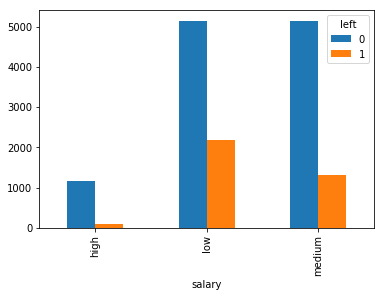

In [27]:
# Impact of salary
pd.crosstab(data.salary,data.left).plot(kind='bar')

As we can see, employees with high salary are likely not to leave company

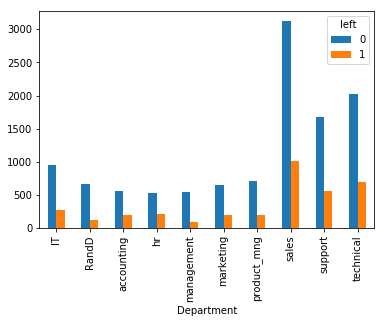

In [28]:
# Impact of department 
pd.crosstab(data.Department, data.left).plot(kind = 'bar')

Sales Department is department has highest employess leave company. but Department is not major factor to retention of employees

## From the data analysis we can conclude the dependant variables in our model are:
1. Satisfaction Level
2. Average Monthly Hours
3. Promotion last 5 years
4. Salary

## Data Cleaning:
As we decided our dependant variables, we can drop other columns as not necessary for our analyst for now

In [37]:
# drop columns
subdata = data.drop(['last_evaluation', 'number_project','number_project','time_spend_company','Work_accident',
                   'Department' ], axis = 'columns')
subdata.head()

,satisfaction_level,average_montly_hours,left,promotion_last_5years,salary
0,0.38,157,1,0,low
1,0.80,262,1,0,medium
2,0.11,272,1,0,medium
3,0.72,223,1,0,low
4,0.37,159,1,0,low


## Plot data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000169C2520BA8>,
      dtype=object)

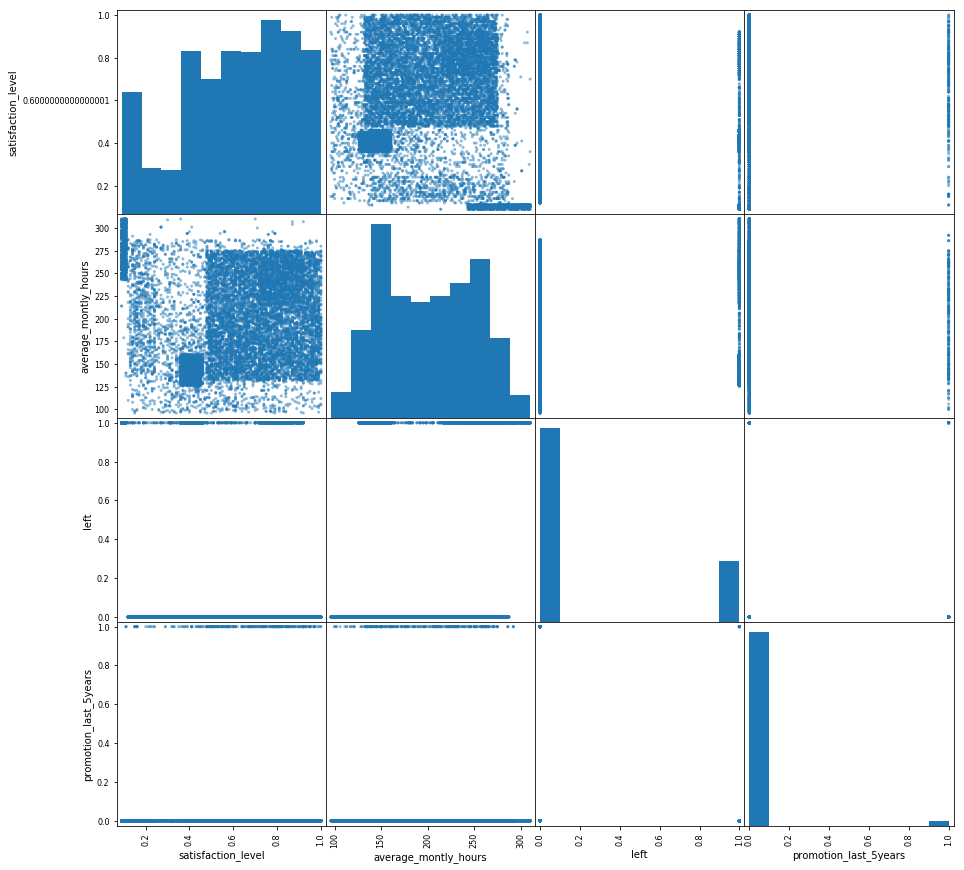

In [55]:
pd.plotting.scatter_matrix(subdata, figsize = (15,15))

# Build Model

The columns "salary" has text data. In order to build our linear regression model, we need to convert to numbers. hence, we will use dummy variables for that

In [38]:
#create dummy variables
dummies = pd.get_dummies(subdata['salary'])

In [39]:
#join dataframe
merged = pd.concat([subdata, dummies], axis = 'columns')
merged.head()

,satisfaction_level,average_montly_hours,left,promotion_last_5years,salary,high,low,medium
0,0.38,157,1,0,low,0,1,0
1,0.80,262,1,0,medium,0,0,1
2,0.11,272,1,0,medium,0,0,1
3,0.72,223,1,0,low,0,1,0
4,0.37,159,1,0,low,0,1,0


In [40]:
#drop columns salary and column medium to build model
final = merged.drop(['salary', 'medium'], axis = 'columns')
final.head()

,satisfaction_level,average_montly_hours,left,promotion_last_5years,high,low
0,0.38,157,1,0,0,1
1,0.80,262,1,0,0,0
2,0.11,272,1,0,0,0
3,0.72,223,1,0,0,1
4,0.37,159,1,0,0,1


In [41]:
X = final.drop('left', axis = 'columns')
Y = final.left

In [64]:
#build model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.3)

C:\Users\Amy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [65]:
model.fit(X_train, Y_train)

C:\Users\Amy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### Accuracy of model

In [67]:
model.score(X_test, Y_test)

0.7719047619047619

The model accuracy is 77.19 %